<a href="https://colab.research.google.com/github/iHakawaTi/Adult-Census-Income-EDA/blob/main/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Data Loading
This section is for installing necessary packages and loading the dataset. We'll ensure the environment is ready for our analysis by importing key libraries and reading the data from a specified path.

In [ ]:
# Install (only run once)
install.packages("dplyr")
install.packages("DescTools")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#load libraries
library(dplyr)
library(DescTools)
library(ggplot2)

# Read data
df = read.csv("/content/adult.csv", header = TRUE)

# Drop column fnlwgt due to its irrelevance
df <- dplyr::select(df, -fnlwgt)

# Data Preprocessing

This section focuses on cleaning and preparing the dataset before any analysis or visualization.


In [ ]:
# Remove duplicates
duplicated_count_before <- sum(duplicated(df))
df <- df[!duplicated(df), ]
duplicated_count_after <- sum(duplicated(df))

cat("Number of duplicated rows before removal:", duplicated_count_before, "\n")
cat("Number of duplicated rows after removal:", duplicated_count_after, "\n")

# Replace '?' with NA
df[df == '?'] <- NA

# Count missing values
cat("Number of missing values in the df (before imputation): ", sum(colSums(is.na(df))), "\n")

# Impute missing values with mode for selected columns
get_mode <- function(x) {
  uniq_x <- unique(x)
  uniq_x[which.max(tabulate(match(x, uniq_x)))]
}

columns_to_impute <- c('workclass', 'occupation', 'native.country')

for (col in columns_to_impute) {
  mode_value <- get_mode(df[[col]])
  df[[col]][is.na(df[[col]])] <- mode_value
}

# Count missing values after imputation
cat("Number of Missing Values in the df (after imputation): ", sum(colSums(is.na(df))), "\n")



Number of duplicated rows before removal: 3465 
Number of duplicated rows after removal: 0 
Number of missing values in the df (before imputation):  3851 
Number of Missing Values in the df (after imputation):  0 


In [ ]:
str(df)

'data.frame':	29096 obs. of  14 variables:
 $ age           : int  90 82 66 54 41 34 38 74 68 41 ...
 $ workclass     : chr  "Private" "Private" "Private" "Private" ...
 $ education     : chr  "HS-grad" "HS-grad" "Some-college" "7th-8th" ...
 $ education.num : int  9 9 10 4 10 9 6 16 9 10 ...
 $ marital.status: chr  "Widowed" "Widowed" "Widowed" "Divorced" ...
 $ occupation    : chr  "Prof-specialty" "Exec-managerial" "Prof-specialty" "Machine-op-inspct" ...
 $ relationship  : chr  "Not-in-family" "Not-in-family" "Unmarried" "Unmarried" ...
 $ race          : chr  "White" "White" "Black" "White" ...
 $ sex           : chr  "Female" "Female" "Female" "Female" ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  4356 4356 4356 3900 3900 3770 3770 3683 3683 3004 ...
 $ hours.per.week: int  40 18 40 40 40 45 40 20 40 60 ...
 $ native.country: chr  "United-States" "United-States" "United-States" "United-States" ...
 $ income        : chr  "<=50K" "<=50K" "<=50K" "<=50

In [ ]:
# Original Row count
dfnrow = nrow(df)

# A vector of the numerical columns to ensure proper conversion
numeric_cols = c("age", "education.num", "capital.gain", "capital.loss", "hours.per.week")

# Apply as.numeric to all selected columns
df[numeric_cols] = lapply(df[numeric_cols], as.numeric)

# calculating z score
z_scores <- scale(df[, numeric_cols])

# Threshold for the zcore is 3
outlier_rows <- apply(abs(z_scores), 1, function(row) any(row > 2.5))

# Removing Outlier rows
df <- df[!outlier_rows, ]

# Row count before and after removing
cat("Original rows:", dfnrow, "\n")
cat("Rows after removing outliers:", nrow(df), "\n")
cat("Rows removed:", dfnrow - nrow(df), "\n")

Original rows: 29096 
Rows after removing outliers: 25843 
Rows removed: 3253 


# Descriptive Statistics

Descriptive statistics were computed to better understand the dataset and provide an overview of the variables.

In [ ]:
# A function that calculates (Mean,Median,SD,Min,Max)
calculate_stats <- function(x) {
  c(
    Mean = mean(x),
    Median = median(x),
    SD = sd(x),
    Min = min(x),
    Max = max(x)

  )
}

# Apply the function to all numerical columns
stats <- sapply(df[, numeric_cols], calculate_stats)

# Print the results
print(stats)

            age education.num capital.gain capital.loss hours.per.week
Mean   38.43567     10.188368     643.4976     1.201138       40.46194
Median 37.00000     10.000000       0.0000     0.000000       40.00000
SD     12.93713      2.405195    2455.7350    31.469652       10.72328
Min    17.00000      4.000000       0.0000     0.000000        9.00000
Max    73.00000     16.000000   20051.0000  1138.000000       72.00000


In [ ]:
# Define a consistent pastel blue palette
soft_blues <- c("#a6cee3", "#1f78b4", "#6baed6", "#2171b5")


# Exploratory Data Analysis (EDA)
This section of the notebook is dedicated to understanding the dataset through statistical summaries and visualizations.

Percentage of people with income >50K: 23.25%
Percentage of people with income <=50K: 76.75%


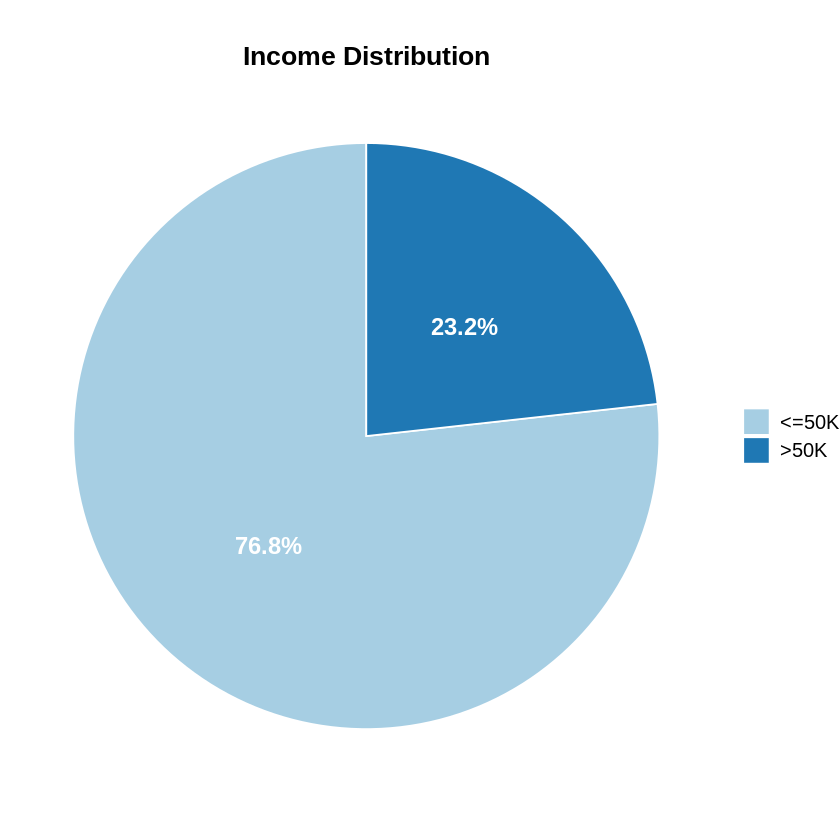

In [ ]:
# Income group percentage calculation
high_income_count <- sum(df$income == ">50K")
low_income_count <- sum(df$income == "<=50K")
total <- high_income_count + low_income_count
high_income_percentage <- (high_income_count / total) * 100
low_income_percentage <- (low_income_count / total) * 100

cat(sprintf("Percentage of people with income >50K: %.2f%%\n", high_income_percentage))
cat(sprintf("Percentage of people with income <=50K: %.2f%%\n", low_income_percentage))

# Creating age brackets as follows {0-18, 18-30, 30-50, 50+}
df <- df %>%
  mutate(Age_Bracket = cut(age,
                         breaks = c(0, 18, 30, 50, Inf),
                         right = FALSE,
                         labels = c("0-18", "18-30", "30-50", "50+")))


# Creating hours.per.week brackets as follows {0-20,20-40,40+}
df <- df%>%
  mutate(hours.per.week_group = cut(hours.per.week,
                         breaks = c(0,20,40,Inf),
                         right = FALSE,
                         labels=c("0-20","20-40","40+")))

library(ggplot2)

# Soft blue palette for income
income_colors <- c("#a6cee3", "#1f78b4")  # light blue & medium blue

ggplot(income_df, aes(x = "", y = Percentage, fill = Income)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y") +
  theme_void() +
  labs(title = "Income Distribution") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")),
            position = position_stack(vjust = 0.5),
            size = 5, color = "white", fontface = "bold") +
  scale_fill_manual(values = income_colors) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    legend.title = element_blank(),
    legend.text = element_text(size = 12)
  )



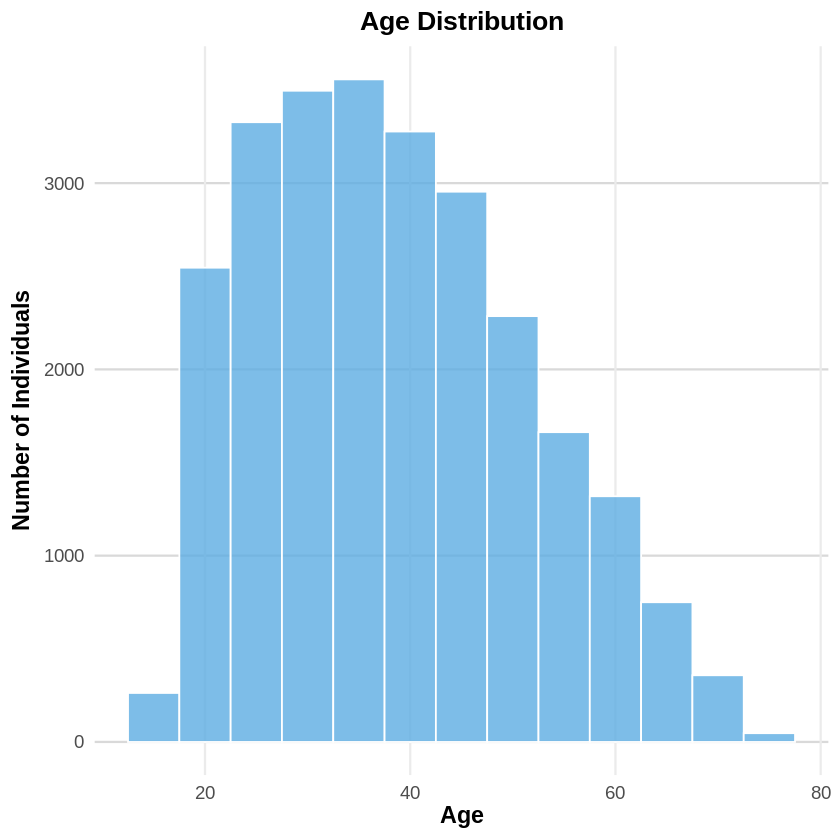

In [ ]:
ggplot(df, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = "#5DADE2", color = "white", alpha = 0.8) +
  labs(title = "Age Distribution",
       x = "Age",
       y = "Number of Individuals") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    panel.grid.major.y = element_line(color = "grey85"),
    panel.grid.minor = element_blank()
  )

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


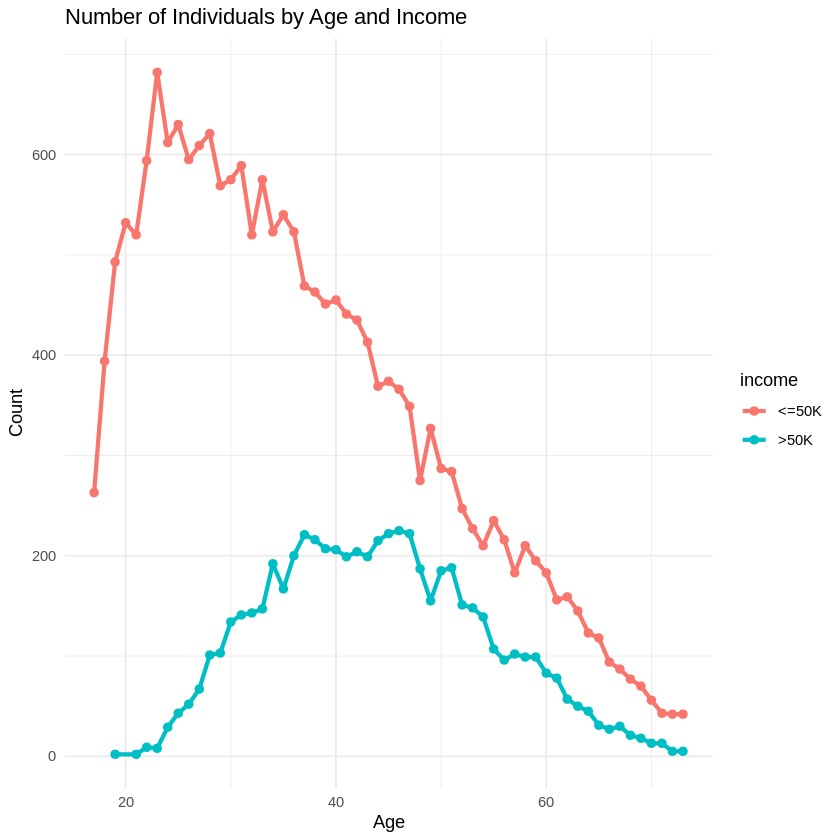

In [ ]:
age_income <- df %>%
  group_by(age, income) %>%
  summarise(count = n())

ggplot(age_income, aes(x = age, y = count, color = income)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  labs(title = "Number of Individuals by Age and Income",
       x = "Age", y = "Count") +
  theme_minimal()



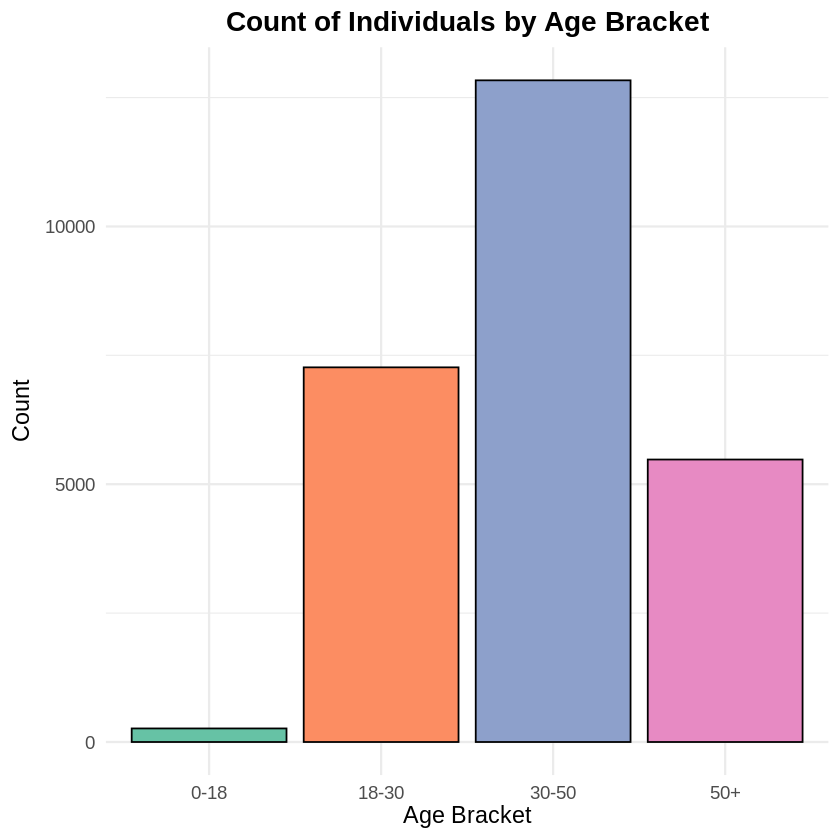

In [ ]:
library(RColorBrewer)

# Pastel palette for age brackets
age_colors <- brewer.pal(4, "Set2")

ggplot(df, aes(x = Age_Bracket, fill = Age_Bracket)) +
  geom_bar(color = "black") +
  labs(title = "Count of Individuals by Age Bracket",
       x = "Age Bracket",
       y = "Count") +
  theme_minimal(base_size = 14) +
  scale_fill_manual(values = age_colors) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "none"
  )



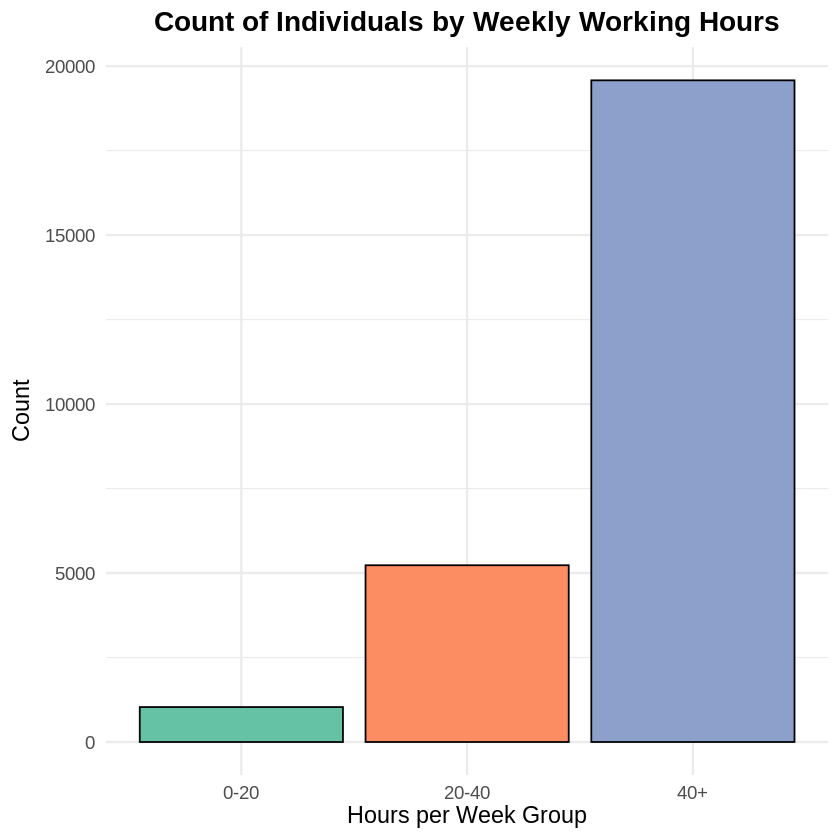

In [ ]:
# Pastel palette for hours per week
hours_colors <- brewer.pal(3, "Set2")

ggplot(df, aes(x = hours.per.week_group, fill = hours.per.week_group)) +
  geom_bar(color = "black") +
  labs(title = "Count of Individuals by Weekly Working Hours",
       x = "Hours per Week Group",
       y = "Count") +
  theme_minimal(base_size = 14) +
  scale_fill_manual(values = hours_colors) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "none"
  )


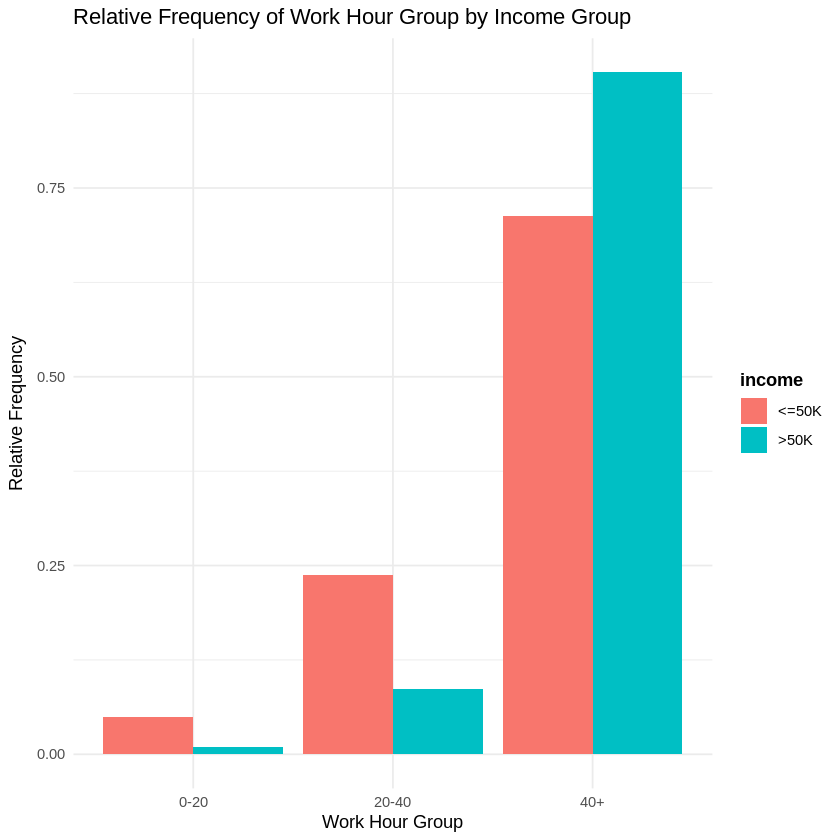

In [ ]:
group_counts <- df %>%
  count(income, hours.per.week_group) %>%
  group_by(income) %>%
  mutate(relative_freq = n / sum(n)) %>%
  ungroup()

# Plot the relative frequency of hours.per.week groups by income group
ggplot(group_counts, aes(x = hours.per.week_group, y = relative_freq, fill = income)) +
  # Use geom_col() to create a bar plot for pre-calculated y-values
  geom_col(position = "dodge") +
  # Add titles and labels for the plot
  labs(
    title = "Relative Frequency of Work Hour Group by Income Group",
    x = "Work Hour Group",
    y = "Relative Frequency"
  ) +
  # Use a clean, minimal theme
  theme_minimal() +
  # Adjust the legend title
  theme(legend.title = element_text(face = "bold"))

# Inferential Statistics

Inferential statistics were applied to determine relationships between categorical variables and to test hypotheses about the population represented in the dataset.

In [ ]:
# --- Perform Chi-Squared Test to determine the relationship between 'education' and 'income' ---

# This test examines if there is a statistically significant association between
# two categorical variables: education level and income group.

# Hypotheses for the test:
# H0 (Null Hypothesis): Education and Income are independent (no relationship).
# H1 (Alternative Hypothesis): Education and Income are dependent (a relationship exists).

chisq_result <- chisq.test(df$education, df$income)

# Print the test results
print(chisq_result)

# --- Conclusion based on the Chi-Squared Test ---
# The test resulted in a p-value < 2.2e-16, which is much less than the
# significance level of 0.05.
# This leads us to reject the null hypothesis (H0), and accepting the alternative hypothesis (H1).
# Conclusion: We conclude that there is a statistically significant relationship between a person's education and their income.


	Pearson's Chi-squared test

data:  df$education and df$income
X-squared = 2995.7, df = 12, p-value < 2.2e-16



               Df  Sum Sq Mean Sq F value Pr(>F)    
Age_Bracket     3  219771   73257   687.9 <2e-16 ***
Residuals   25839 2751767     106                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


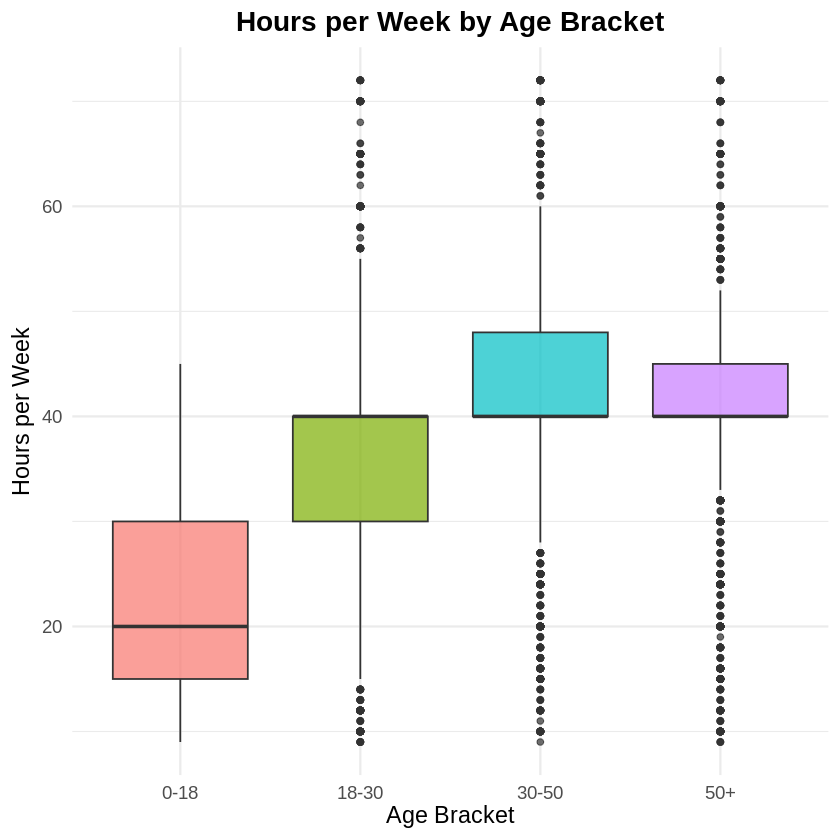

In [ ]:
# --- Perform ANOVA to compare the mean hours.per.week across different age brackets ---

# The ANOVA test is used to determine if there are statistically significant
# differences between the means of three or more independent groups.
# In this case, we are comparing the average 'hours.per.week' (a numerical variable)
# across our four 'Age_Bracket' categories.

# Hypotheses for the test:
# H0 (Null Hypothesis): The mean hours.per.week is the same for all age brackets.
# H1 (Alternative Hypothesis): At least one age bracket has a different mean hours.per.week.

# Create the ANOVA model. The formula 'y ~ x' tests how 'x' influences 'y'.
anova_model <- aov(hours.per.week ~ Age_Bracket, data = df)

# Print a summary of the ANOVA model, which includes the F-statistic and p-value.
print(summary(anova_model))

# --- Conclusion based on the ANOVA Test ---
# The test produced a very small p-value (< 2e-16), which is much less than the
# standard significance level of 0.05.
# This result leads us to reject the null hypothesis (H0), and accepting the alternative hypothesis (H1).
# Conclusion: We can conclude that there is a statistically significant difference in the
# average number of hours worked per week across the different age brackets.
ggplot(df, aes(x = Age_Bracket, y = hours.per.week, fill = Age_Bracket)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Hours per Week by Age Bracket",
       x = "Age Bracket",
       y = "Hours per Week") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "none"
  )


In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




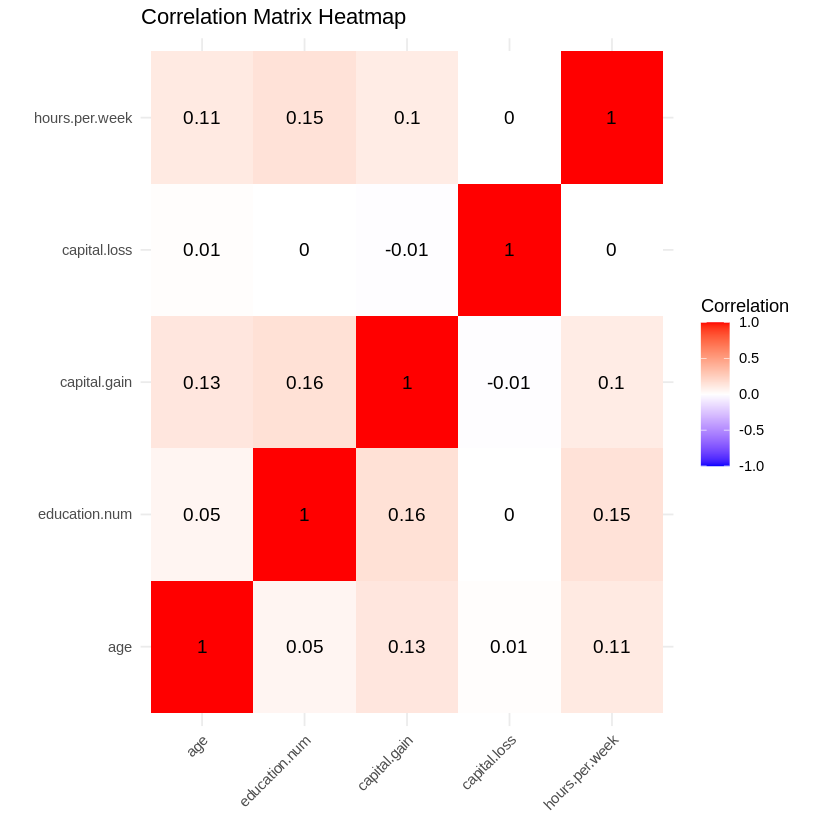

In [ ]:
# install.packages("reshape2") # Uncomment and run this if you don't have it
library(reshape2)
library(ggplot2)

# Select only the numerical columns for the correlation analysis
numerical_data <- df %>%
  dplyr::select(age, education.num, capital.gain, capital.loss, hours.per.week)

# Compute the correlation matrix
correlation_matrix <- cor(numerical_data)

# Reshape the matrix into a data frame for plotting with ggplot2
melted_cor_matrix <- melt(correlation_matrix)

# Create the heatmap
ggplot(melted_cor_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), name = "Correlation") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +
  theme_minimal() +
  labs(title = "Correlation Matrix Heatmap") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank())